# Customers profils analysis

## MAYENE Bienvenue Schékina

### 02 Octobre 2023

# Objectif de l'étude :

Une agence marketing a envoyé un mailing à un représentatif de sa clientèle, soit 39 779 
clients afin de proposer un nouveau service. Le but de cette étude est d’analyser le profil 
des répondants à l’offre marketing et de trouver la formule de score permettant de 
« noter » l’ensemble des clients de l’enseigne et de cibler au mieux les individus ayant la 
plus forte probabilité de répondre positivement à l’offre commerciale.

# Plan d'analyse : 

1-) Inspection et mise en forme de la base de données  

2-) Relation entre notre VAE et les variables explicatives :
* Analyse du profil des répondants
* Analyse des potentielles liaisons entre nos variables

3-) Machine Learning:
* Division de la base de données
* entrainement et test des modèles
* Evaluation du modèle : Métriques, cross validation ou gridSearcCV


# Partie 1 : Inspection de la base de données

## 1-1) Vue d'ensemble

In [1]:
# Chargement des librairies 

import pandas as pd
import scipy.stats as sp # pour l'analyse univariée
import statsmodels.api as sm
import matplotlib.pyplot as plt   # Pour la visualisation
import seaborn as sns

C:\Users\mayen\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\mayen\AppData\Local\Temp\ipykernel_20980\3518893773.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split

In [2]:
# Importation de la base de données 

mailing = pd.read_table("mailing_fin.txt")

# Apperçue du jeux de données
mailing.head()

,RETOUR,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,BUY6,BUY12,BUY18,VALUE24,COA6,fin
0,NON,45,52,F,1,748,0,A,0,0,0,209,0,0
1,NON,56,79,NaN,1,732,0,A,0,0,0,109,0,0
2,OUI,49,54,F,0,727,0,A,0,0,1,447,0,0
3,OUI,44,40,NaN,1,708,1,A,0,0,0,151,0,0
4,NON,59,41,F,0,646,1,A,0,0,0,233,0,0


## Dictionnaire des variables :

**BUY6 :** Nombre de commandes passé dans les 6 derniers mois

**BUY12 :** Nombre de commandes passées dans les 12 derniers mois

**BUY18 :** Nombre de commandes passées dans les 18 derniers mois

**COA6 :** Changement d’adresse OUI/NON

**FICO :** Revenu financiers

**INCOME :** Revenu

**LOC :** Localité A ;B ;C ;…;H

**MARRIED :** Marié/Pas marié OUI/NON

**OWNHOME :** Propriétaire ou non OUI/NON

**RETOUR :** A répondu au mail du 16 avril OUI/NON

**SEX :** Civilité du client M/F

**VALUE24 :** Montant des commandes sur 24 mois

In [3]:
# dimension
mailing.shape

(39779, 14)

In [4]:
#structure
mailing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39779 entries, 0 to 39778
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   RETOUR   39779 non-null  object
 1   AGE      39779 non-null  int64 
 2   INCOME   39779 non-null  int64 
 3   SEX      39721 non-null  object
 4   MARRIED  39779 non-null  int64 
 5   FICO     39779 non-null  int64 
 6   OWNHOME  39779 non-null  int64 
 7   LOC      39779 non-null  object
 8   BUY6     39779 non-null  int64 
 9   BUY12    39779 non-null  int64 
 10  BUY18    39779 non-null  int64 
 11  VALUE24  39779 non-null  int64 
 12  COA6     39779 non-null  int64 
 13  fin      39779 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 4.2+ MB


**Avons nous des valeurs manquantes dans la base de données?**

In [4]:
pd.isnull(mailing).sum()

RETOUR      0
AGE         0
INCOME      0
SEX        58
MARRIED     0
FICO        0
OWNHOME     0
LOC         0
BUY6        0
BUY12       0
BUY18       0
VALUE24     0
COA6        0
fin         0
dtype: int64

## 1-2) Mise en forme de la base de données

**Valeurs manquantes**

D'après les résultats précedent, nous observons que seul la variable SEX possède des valeurs manquantes. Nous décidons de remplacer ces données manquantes par le mode de la variable

In [5]:
#Mode de la variable SEX

mailing.SEX.value_counts()

SEX
M    21205
F    18516
Name: count, dtype: int64

In [3]:
# remplacement des valeurs manquantes par le Mode

mailing["SEX"] = mailing["SEX"].astype("category")

mode_sex = mailing["SEX"].mode().iloc[0]

mailing["SEX"].fillna(mode_sex, inplace = True)


C:\Users\mayen\AppData\Local\Temp\ipykernel_20980\1602829687.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mailing["SEX"].fillna(mode_sex, inplace = True)


In [4]:
# Vérification
pd.isnull(mailing).sum()

RETOUR     0
AGE        0
INCOME     0
SEX        0
MARRIED    0
FICO       0
OWNHOME    0
LOC        0
BUY6       0
BUY12      0
BUY18      0
VALUE24    0
COA6       0
fin        0
dtype: int64

**Recodage et changement du type de nos variables**

In [5]:
#Labéllisation
# Retransformation du type de la variable en objet

mailing["SEX"] = mailing["SEX"].astype('object')
# Variable SEX
mailing.loc[mailing["SEX"] == "F", "SEX"] = 1
mailing.loc[mailing["SEX"] == "M", "SEX"] = 0


In [6]:
# Variable RETOUR
mailing.loc[mailing.RETOUR == "OUI", "RETOUR"] = 1
mailing.loc[mailing.RETOUR == "NON", "RETOUR"] = 0

In [7]:
# Variable LOC
mailing.loc[mailing.LOC == "A", "LOC"] = 0
mailing.loc[mailing.LOC == "B", "LOC"] = 1
mailing.loc[mailing.LOC == "C", "LOC"] = 2
mailing.loc[mailing.LOC == "D", "LOC"] = 3
mailing.loc[mailing.LOC == "E", "LOC"] = 4
mailing.loc[mailing.LOC == "F", "LOC"] = 5
mailing.loc[mailing.LOC == "G", "LOC"] = 6
mailing.loc[mailing.LOC == "H", "LOC"] = 7

In [9]:
mailing.head()

,RETOUR,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,BUY6,BUY12,BUY18,VALUE24,COA6,fin
0,0,45,52,1,1,748,0,0,0,0,0,209,0,0
1,0,56,79,0,1,732,0,0,0,0,0,109,0,0
2,1,49,54,1,0,727,0,0,0,0,1,447,0,0
3,1,44,40,0,1,708,1,0,0,0,0,151,0,0
4,0,59,41,1,0,646,1,0,0,0,0,233,0,0


In [15]:
mailing.columns

Index(['RETOUR', 'AGE', 'INCOME', 'SEX', 'MARRIED', 'FICO', 'OWNHOME', 'LOC',
       'BUY6', 'BUY12', 'BUY18', 'VALUE24', 'COA6', 'fin'],
      dtype='object')

In [8]:
# Recodage des variables catégorielle en type "category"

variables_cat = ['RETOUR', 'SEX','MARRIED','OWNHOME', 'LOC','COA6']

def cat_var(vector):
    if vector.dtypes == 'int64' or vector.dtypes == 'object':
        vector = vector.astype("category")
    return vector
    

In [9]:
# application de la fonction 

for i in variables_cat:
    mailing[i] = cat_var(mailing[i])


In [12]:
# Vérification des types des variables de notre base de données

mailing.loc[:, variables_cat].dtypes

RETOUR     category
SEX        category
MARRIED    category
OWNHOME    category
LOC        category
COA6       category
dtype: object

**Résumé des changements opérés sur nos variables**

RETOUR
>- 1 : OUI
>- 0 : NON

SEX
>- 1 : Femme
>- 0 : Homme

LOC

>-A : 0

>-B : 1

>-C : 2

>-D : 3

>-E : 4

>-F : 5

>-G : 6

>-H : 7

# Partie II : Relation entre notre VAE et les variables explicatives

Dans cette partie nous tenterons d'observer comment se comportent nos variables explicatives en fonction de notre variable à expliquer en analysant le profil des clients ayant répondu à l'offre commerciale

## 1-) Variables catégorielles 


In [17]:
mailing.groupby(["SEX", "RETOUR"]).size().unstack()

C:\Users\mayen\AppData\Local\Temp\ipykernel_20792\1165808149.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mailing.groupby(["SEX", "RETOUR"]).size().unstack()


RETOUR,0,1
SEX,,
0,18484,2779
1,15892,2624


C:\Users\mayen\AppData\Local\Temp\ipykernel_19144\3860330726.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = mailing.groupby([var, "RETOUR"]).size().unstack()
C:\Users\mayen\AppData\Local\Temp\ipykernel_19144\3860330726.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = mailing.groupby([var, "RETOUR"]).size().unstack()
C:\Users\mayen\AppData\Local\Temp\ipykernel_19144\3860330726.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

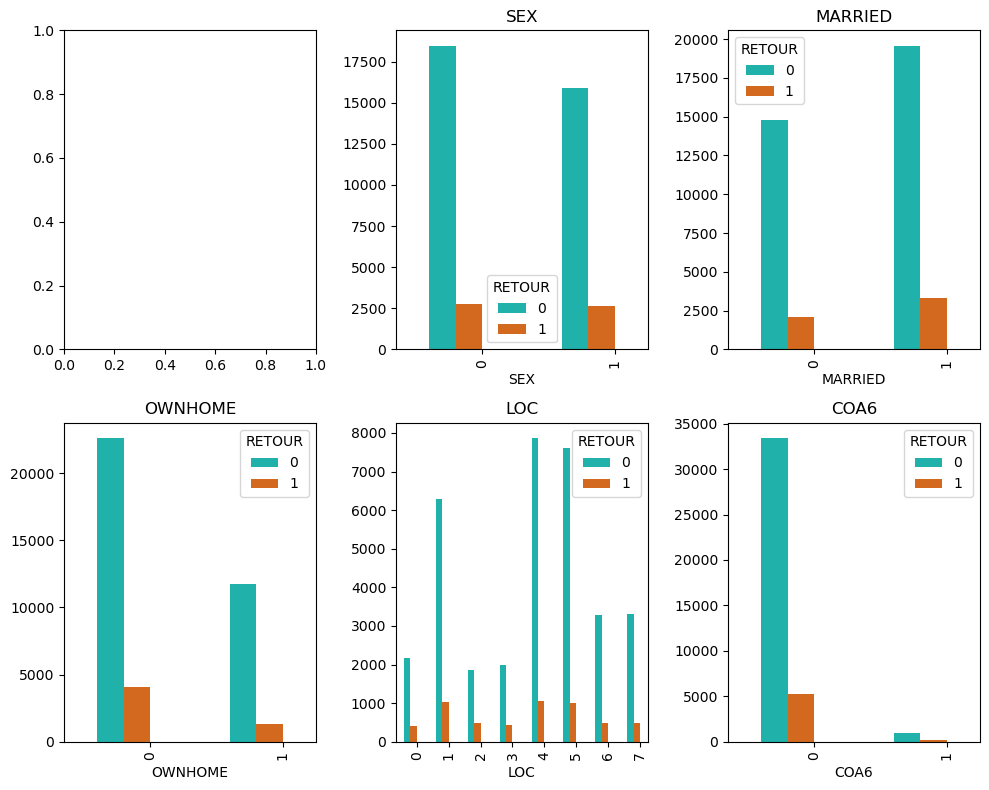

In [13]:
# Diagrammes en barres en fonction de la VAE

fig, axes = plt.subplots(2,3, figsize = (10,8))

axes = axes.flatten()

for i, var in enumerate(variables_cat):
    if var != "RETOUR" :
        counts = mailing.groupby([var, "RETOUR"]).size().unstack()
        # Plot des barres côte à côte
        counts.plot(kind="bar", ax=axes[i], width=0.4, position=1, color=['#20B2AA', '#D2691E'])
        axes[i].set_title(var)

# Supprimer les axes non utilisés
for j in range(len(variables_cat), len(axes)):
    fig.delaxes(axes[j])

    
plt.tight_layout()
plt.show()

**Commentaires :**

D'après les résultats obtenues, nous constatons que les personnes ayant le plus répondu à l'offre commerciale de l'entreprise sont : 
>- Les hommes,
>- Les personnes marriés
>- Les personnes qui ne sont pas propriétaires de leur logement
>- Les personnes qui n'ont pas changé d'adresse
>- Les personnes résidents dans les zones 1, 4 et 5

## 2-) Variables quantitatives

In [43]:
mailing.columns

Index(['RETOUR', 'AGE', 'INCOME', 'SEX', 'MARRIED', 'FICO', 'OWNHOME', 'LOC',
       'BUY6', 'BUY12', 'BUY18', 'VALUE24', 'COA6', 'fin'],
      dtype='object')

C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

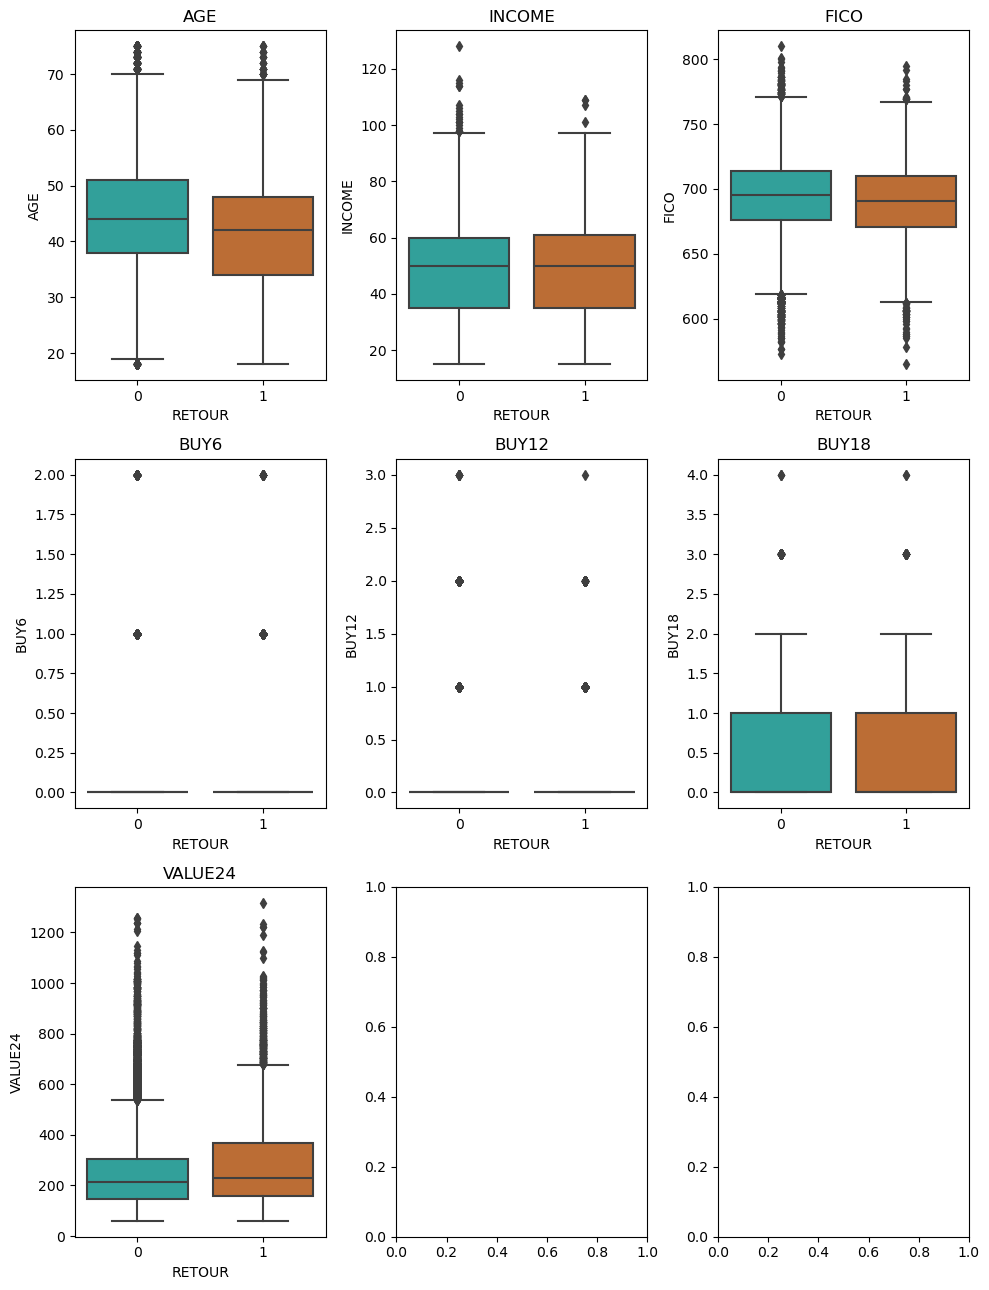

In [15]:
##
variables_quant = ['AGE', 'INCOME','FICO', 'BUY6', 'BUY12', 'BUY18', 'VALUE24']

fig,axes = plt.subplots(3,3, figsize = (10,13))

axes = axes.flatten()

for i, var in enumerate(variables_quant) :
    sns.boxplot(y= mailing[var], x=mailing["RETOUR"], ax = axes[i],palette = ['#20B2AA', '#D2691E'])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

In [22]:
# summary selon la variable RETOUR

for var in variables_quant :
    res = mailing[var].groupby(mailing["RETOUR"]).describe()
    print(f"Résultats pour {var} : \n{res}\n")

  

Résultats pour AGE : 
          count       mean        std   min   25%   50%   75%   max
RETOUR                                                             
0       34376.0  44.726233  10.085549  18.0  38.0  44.0  51.0  75.0
1        5403.0  41.602813  10.678739  18.0  34.0  42.0  48.0  75.0

Résultats pour INCOME : 
          count       mean        std   min   25%   50%   75%    max
RETOUR                                                              
0       34376.0  47.772225  15.982724  15.0  35.0  50.0  60.0  128.0
1        5403.0  47.849898  16.419354  15.0  35.0  50.0  61.0  109.0

Résultats pour FICO : 
          count        mean        std    min    25%    50%    75%    max
RETOUR                                                                   
0       34376.0  694.260414  28.641701  573.0  676.0  695.0  714.0  810.0
1        5403.0  690.111049  29.679877  565.0  671.0  691.0  710.0  795.0

Résultats pour BUY6 : 
          count      mean       std  min  25%  50%  75%  max

C:\Users\mayen\AppData\Local\Temp\ipykernel_19144\906221814.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = mailing[var].groupby(mailing["RETOUR"]).describe()
C:\Users\mayen\AppData\Local\Temp\ipykernel_19144\906221814.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = mailing[var].groupby(mailing["RETOUR"]).describe()
C:\Users\mayen\AppData\Local\Temp\ipykernel_19144\906221814.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

**Commentaires :**

>- 50% des des personnes ayant répondu à l'offre commerciale sont âgés de moins de 42 ans tandis que 50% des personnes n'ayant pas répondu sont plus âgés de 2 ans.
Nous pouvons dire qu'en général, les personnes ayant répondu à l'offre sont plus jeunes que celles ne l'ayant pas fait. L'écart entre les âges n'est pas très différent en regardant les médianes

>- Les personnes ayant répondu et ceux ne l'ayant pas fait ont en moyenne le même revenu

>- 25% des clients ayant répondu à l'offre ont des montant de commandes s'élevant à plus de 366 sur les 24 derniers mois tandis que 25% des clients n'ayant pas répondu ont des montant de commandes inférieurs sur cette même période

Compte tenu de la présence des valeurs extrêmes et dans le but d'établir un profil de nos clients nous décidons de transformer nos variables quantitatives en variables qualitatives

## 3-) Etude des distributions des variables quantitatives

Pour étudier la distribution de nos variables quantitatives nous allons chercher à savoir si nos variables quantitatives suivent une loinormale. Pour cela nous nous aiderons de diagrammes nous présentant les histogrammes et les QQ-plot de ces variables


C:\Users\mayen\AppData\Local\Temp\ipykernel_6448\3033938025.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = mailing[var], ax = axes[i],bins = 30 , kde = True, palette = ['#20B2AA', '#D2691E'])
C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mayen\AppData\Local\Temp\ipykernel_6448\3033938025.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = mailing[var], ax = axes[i],bins = 30 , kde = True, palette = ['#20B2AA', '#D2691E'])
C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

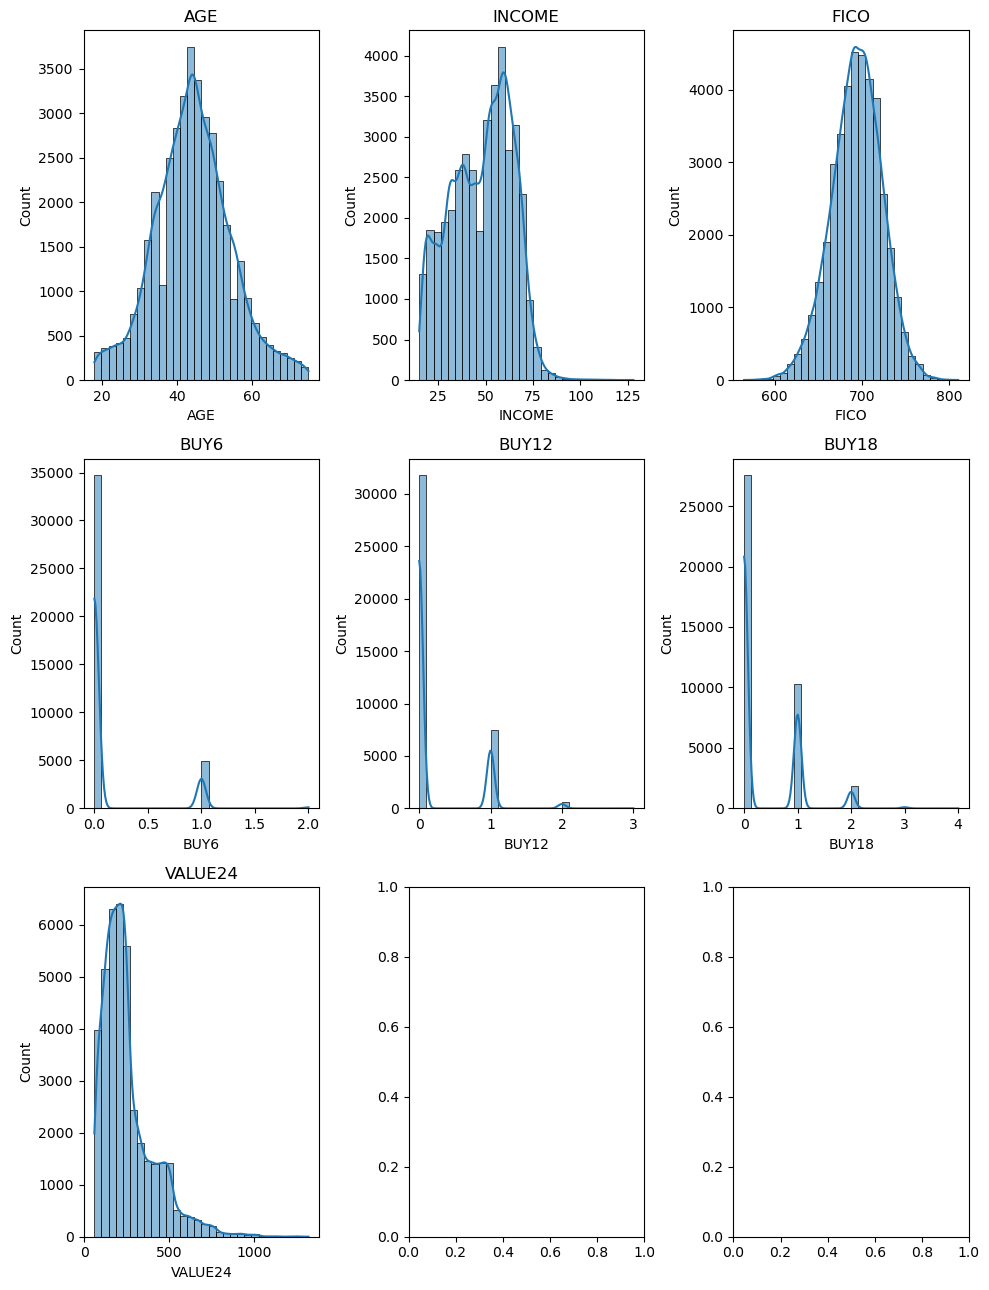

In [62]:
#Histogrammes
fig,axes = plt.subplots(3,3, figsize = (10,13))

axes = axes.flatten()

for i, var in enumerate(variables_quant) :
    sns.histplot(x = mailing[var], ax = axes[i],bins = 30 , kde = True, palette = ['#20B2AA', '#D2691E'])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

**Commentaires :** D'après les résultats obtenues, il nous semble que les variables FICO et AGE suivent une loi normale

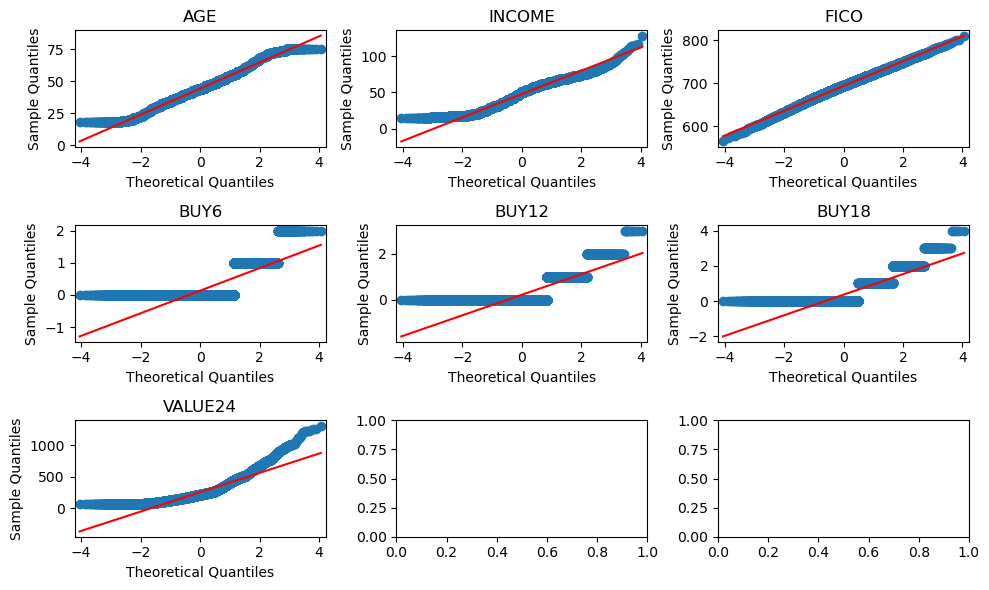

In [43]:
# QQplot
fig, axes = plt.subplots(3,3 , figsize = (10,6))

axes = axes.flatten()

for i, var in enumerate(variables_quant):
    sm.qqplot(mailing[var], line = 's', ax = axes[i])
    axes[i].set_title(var)
    
plt.tight_layout()
plt.show()

**Test sur la normalité de bos variables quanti**

In [ ]:
import pandas as pd
from scipy.stats import anderson, kstest

# Supposons que 'titanic_train' est votre DataFrame et que 'variables_quant' est la liste de vos variables quantitatives
test_normalite = pd.DataFrame(columns=["Variables", "Stat_Anderson", "Critical_value_Anderson", "Stat_KS", "P_value_KS"])

for var in variables_quant:
    resultats_anderson = anderson(titanic_train[var])
    stat_ks, p_value_ks = kstest(titanic_train[var], "norm")
    
    # Utilisation de critical_values pour extraire les p-valeurs correctes du test d'Anderson-Darling
    critical_value_anderson = resultats_anderson.critical_values[2]
    
    test_normalite.loc[len(test_normalite)] = [var,resultats_anderson.statistic, critical_value_anderson, stat_ks, p_value_ks]

# Affichage du dataframe
test_normalite


## 2-) Analyses bivariées

### Variables catégorielles et variable cible

In [ ]:
# P_value et coef de Cramer

resultats = pd.DataFrame(columns = ["Nom_Var","Statistic_test", "P_value", "V_Cramer"])

for i in variables_cat:
    if i != "Survived" :
        contingency_table = pd.crosstab(titanic_train[i], titanic_train["Survived"])
        Statistic_test, P_value,_,_ = chi2_contingency(contingency_table)
            #calcul du V de cramer
        n = len(titanic_train)
        m = min(contingency_table.shape)-1
        V_cramer = np.sqrt(Statistic_test / (n*m))
                # Ajout des résultats dans le dataframe
        resultats.loc[len(resultats)] = [i , Statistic_test, P_value, V_cramer]
    
# Affichage 
resultats

### Variables quanti variables quanti

In [ ]:
# Matrice de corrélation

matrix = titanic_train.loc[:, variables_quant].corr(method = "spearman")

sns.heatmap(matrix, annot = True, cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), fmt = ".2f" )

plt.title("Matrice de corrélation")
plt.show()

### Variable quantitatives et variable cible

In [ ]:
# corrélation entre les variables quantitatives

mailing.AGE.corr(mailing.INCOME)

In [ ]:
# test de corrélation de pearson

sp.pearsonr(mailing.AGE, mailing.INCOME)

C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mayen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

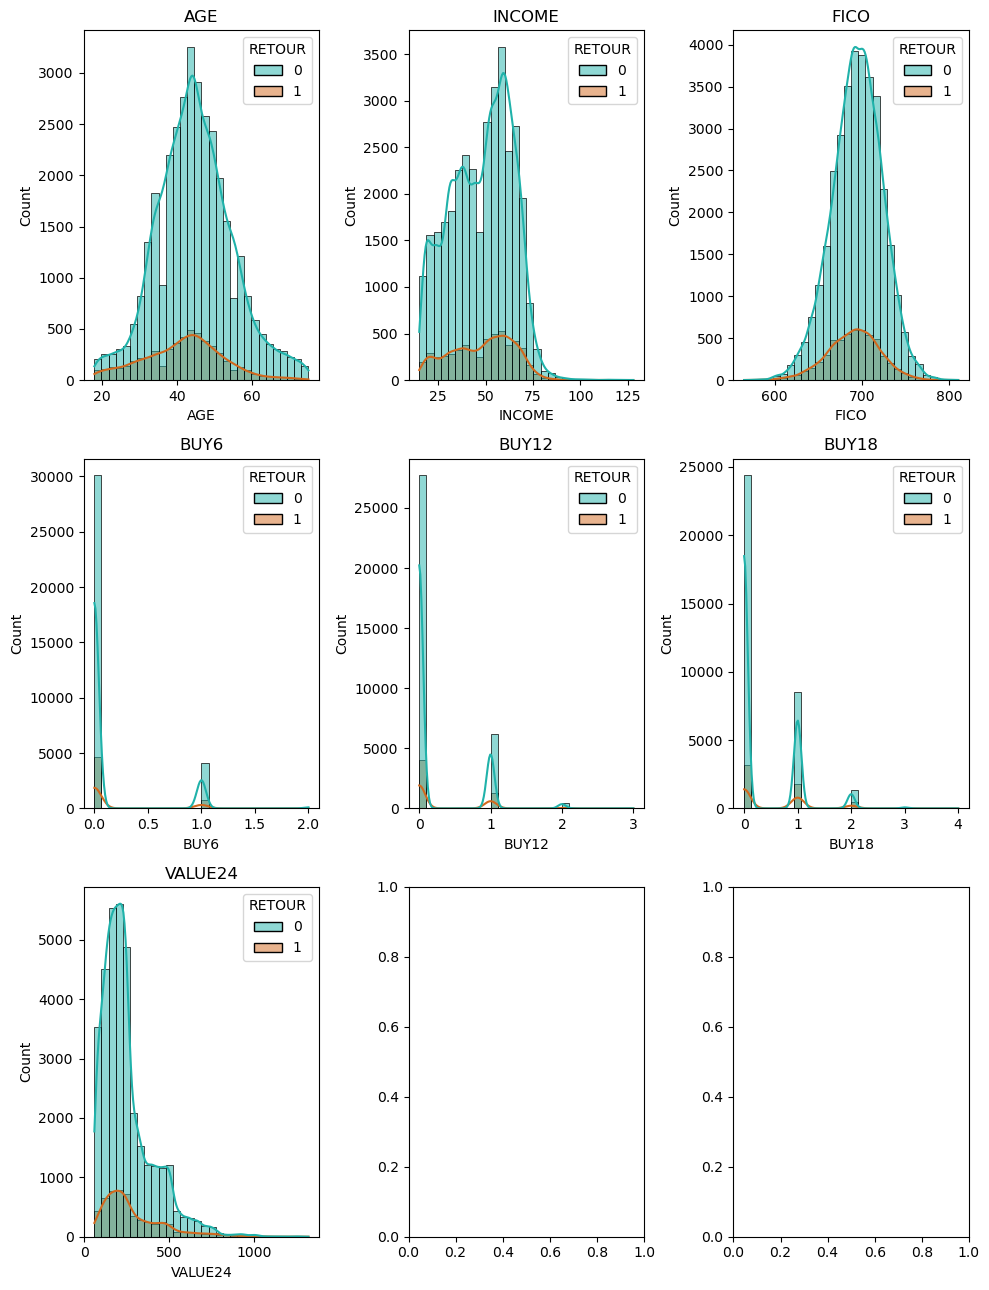

In [64]:
fig,axes = plt.subplots(3,3, figsize = (10,13))

axes = axes.flatten()

for i, var in enumerate(variables_quant) :
    sns.histplot(x = mailing[var], ax = axes[i],hue = mailing["RETOUR"], bins = 30 , kde = True, palette = ['#20B2AA', '#D2691E'])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

# 3- Machine Learning